# 1. EDA, FE and Prediction Model (Wine Dataset)
# 2. EDA, FE and Support Vector Regressor Model (Grad AdmissionDataset)

## 1. EDA and FE on wine dataset
    1. Data Profiling
    2. Statistical analysis
    3. Graphical Analysis
    4. Data Scaling
## 2. SVC on Wine Dataset
    1. SVC Model
    2. Performance metrics for above model
    3. Performance improvement using GridSearchCV


### Wine Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

<h1 style="color: red;">1.0 Importing required libraries</h1>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### For Q-Q Plot
import scipy.stats as stats
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)
### To save the model
import pickle

## 2.1 Importing dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [3]:
dataset = pd.concat([X, y], axis=1)
dataset.shape

(4898, 12)

In [4]:
### getting unique values for quality feature
dataset.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [5]:
### getting count of record for each unique value in quality
dataset.quality.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [6]:
# getting null values and datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
### getting info about numerical features
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


## 2.2 Visualising Numerical data

In [8]:
### getting list of numerical features 
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(numerical_features)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [9]:
### getting count of unique value in each feature
for feature in numerical_features:
 print("'{}' has '{}' No. of unique values".format(feature, dataset[feature].nunique()))

'fixed_acidity' has '68' No. of unique values
'volatile_acidity' has '125' No. of unique values
'citric_acid' has '87' No. of unique values
'residual_sugar' has '310' No. of unique values
'chlorides' has '160' No. of unique values
'free_sulfur_dioxide' has '132' No. of unique values
'total_sulfur_dioxide' has '251' No. of unique values
'density' has '890' No. of unique values
'pH' has '103' No. of unique values
'sulphates' has '79' No. of unique values
'alcohol' has '103' No. of unique values
'quality' has '7' No. of unique values


In [10]:
continuous_features=[feature for feature in numerical_features if dataset[feature].nunique()>7]
print(continuous_features)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<Axes: xlabel='quality', ylabel='count'>

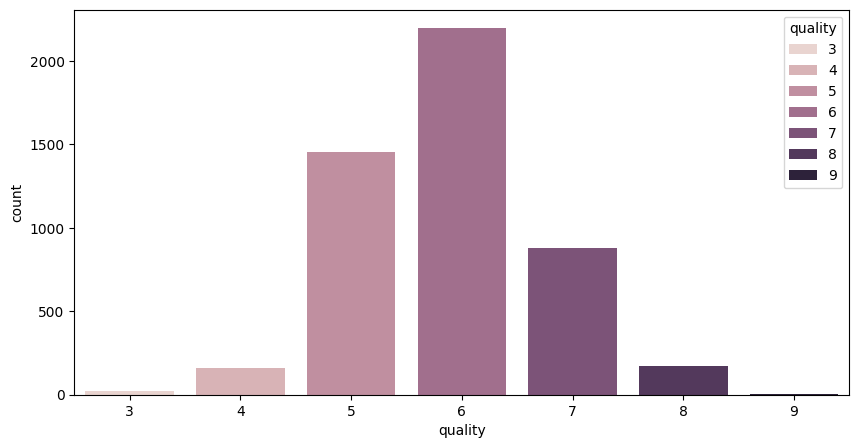

In [11]:
### visualising count of quality feature
plt.figure(figsize=(10,5))
sns.countplot(data=dataset, x='quality',hue='quality')

In [12]:
#dataset.drop(dataset[dataset['quality'] == 9].index, inplace=True)
#dataset.reset_index(drop=True, inplace=True)

In [13]:
dataset.shape

(4898, 12)

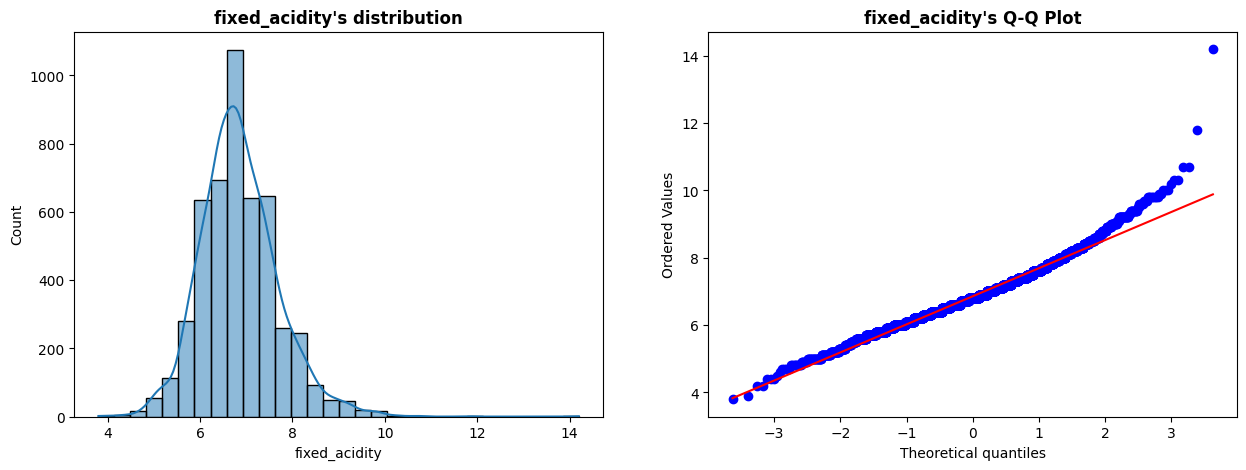

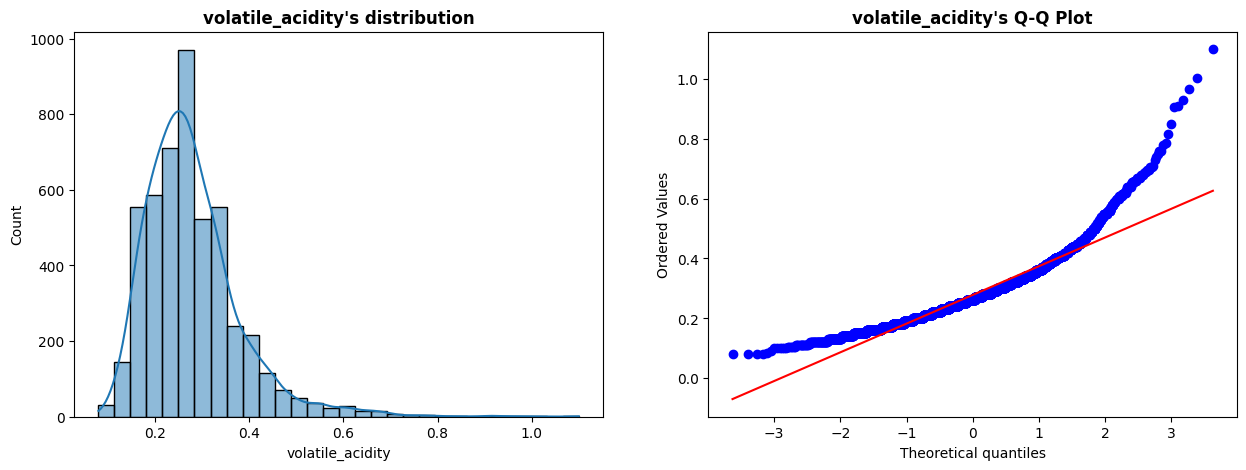

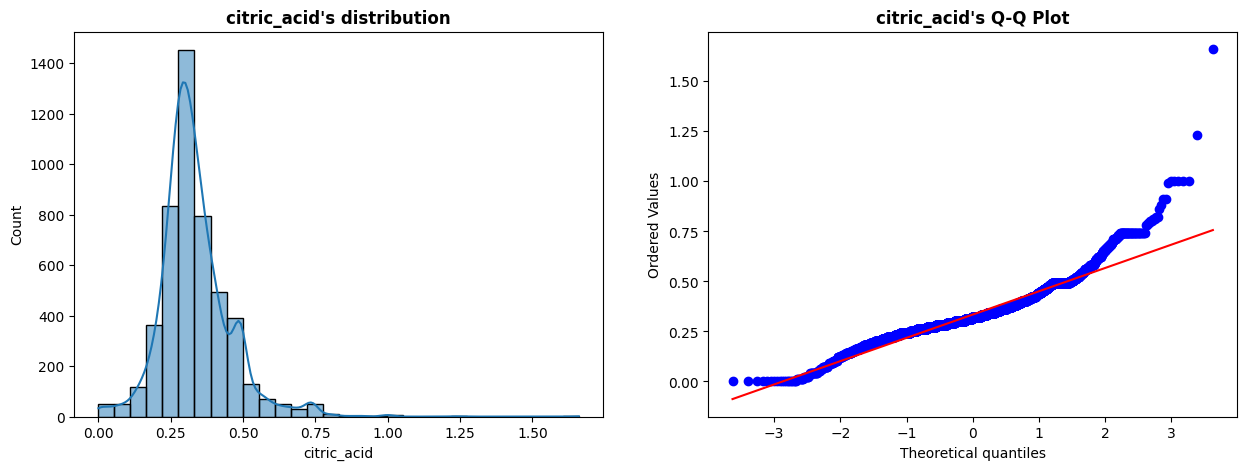

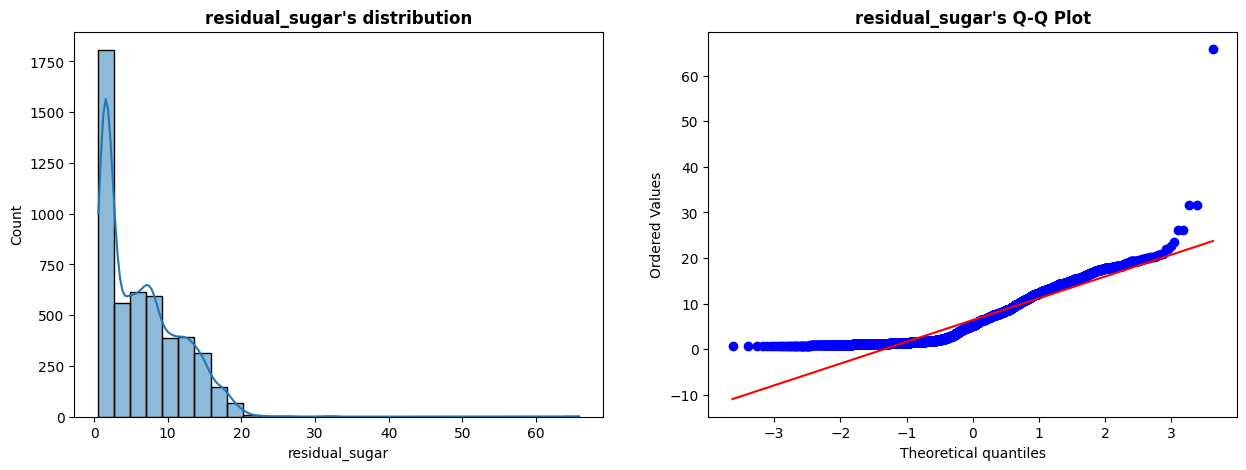

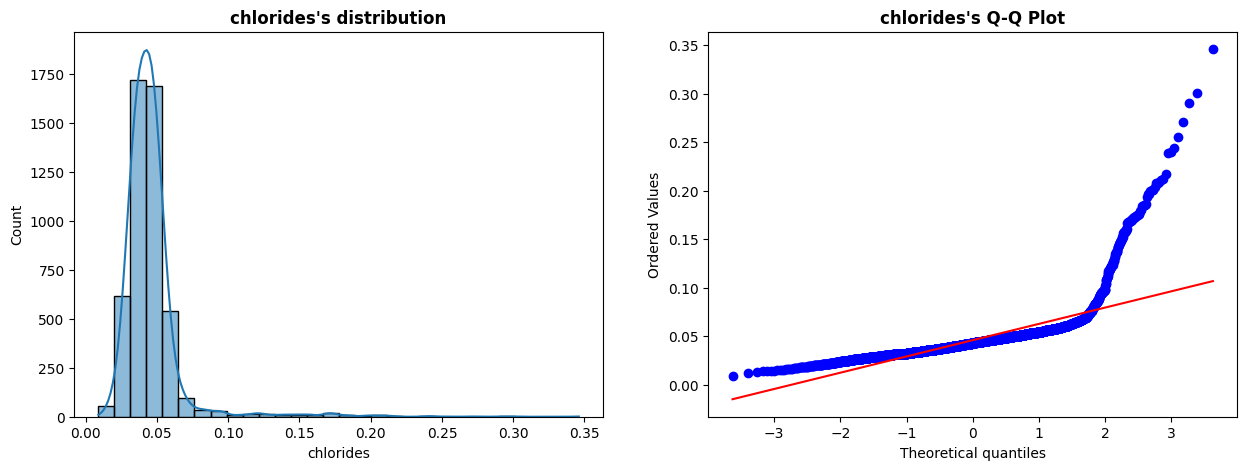

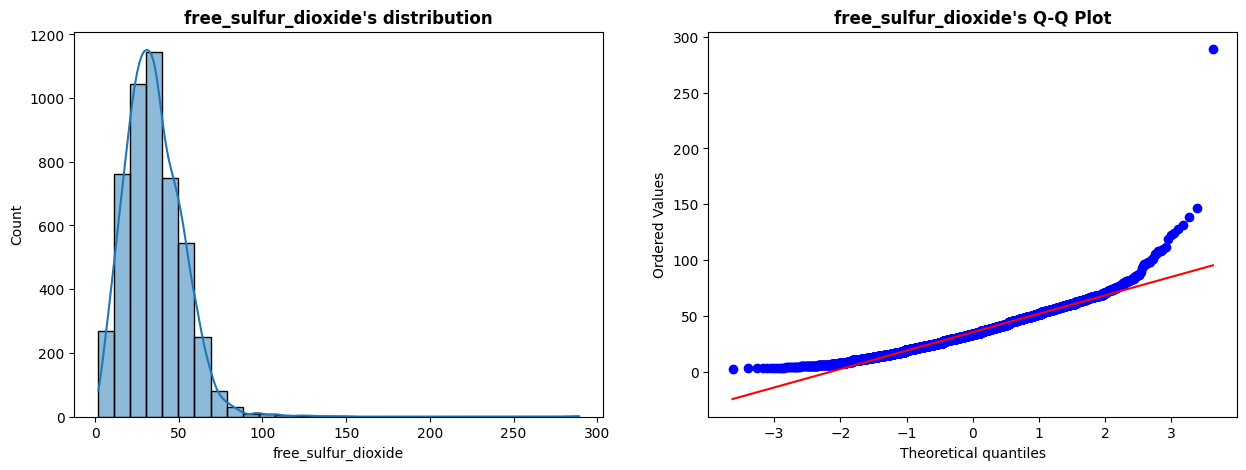

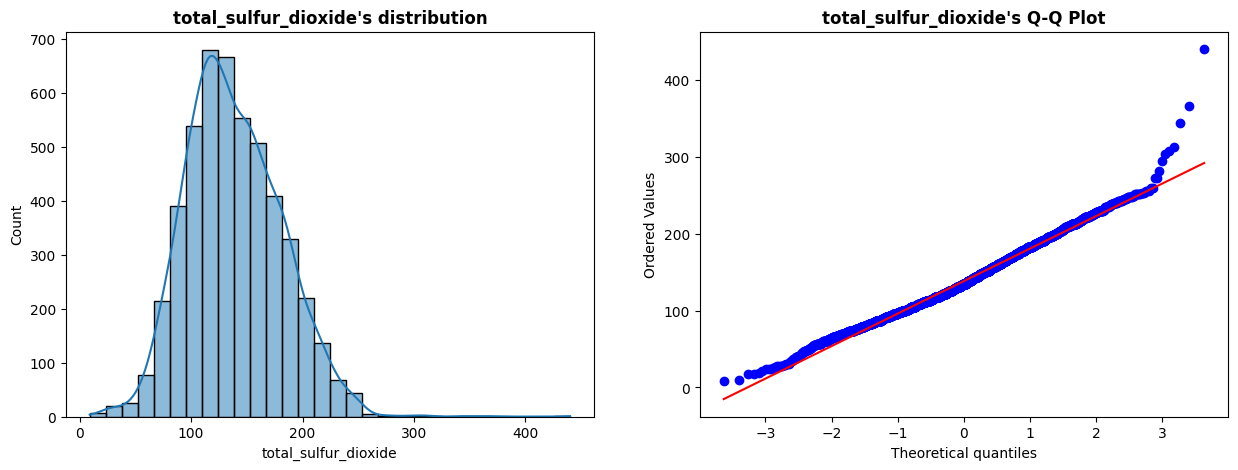

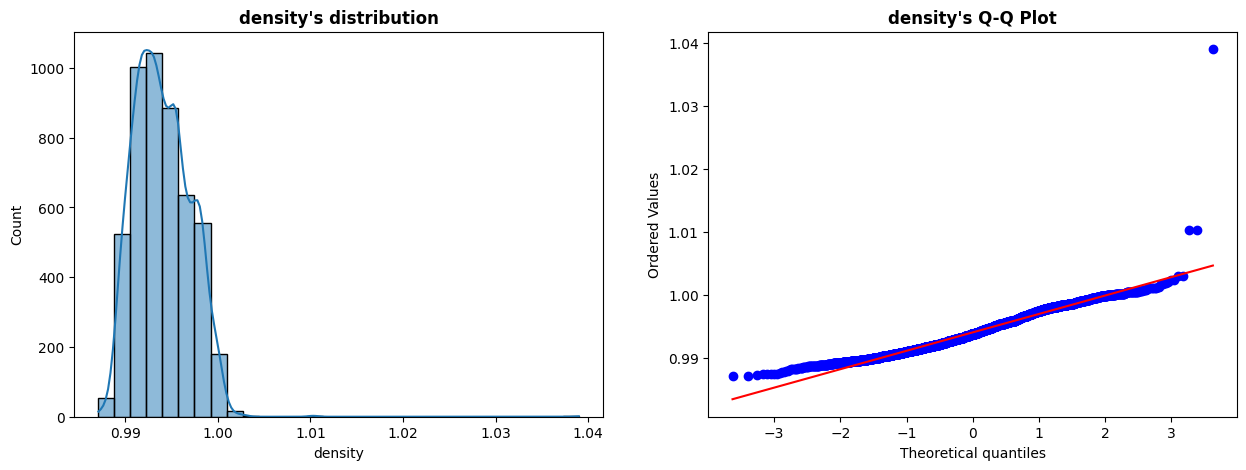

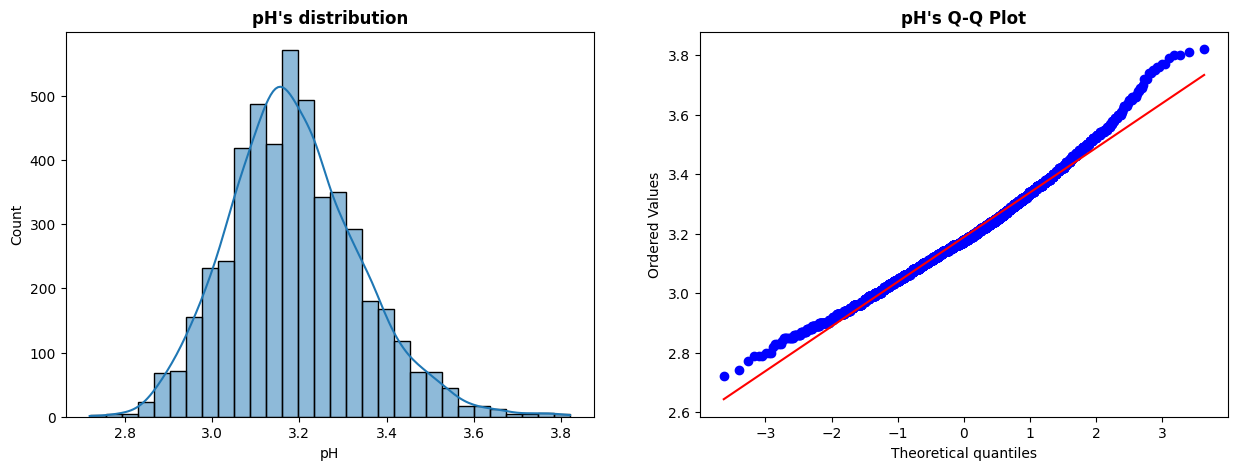

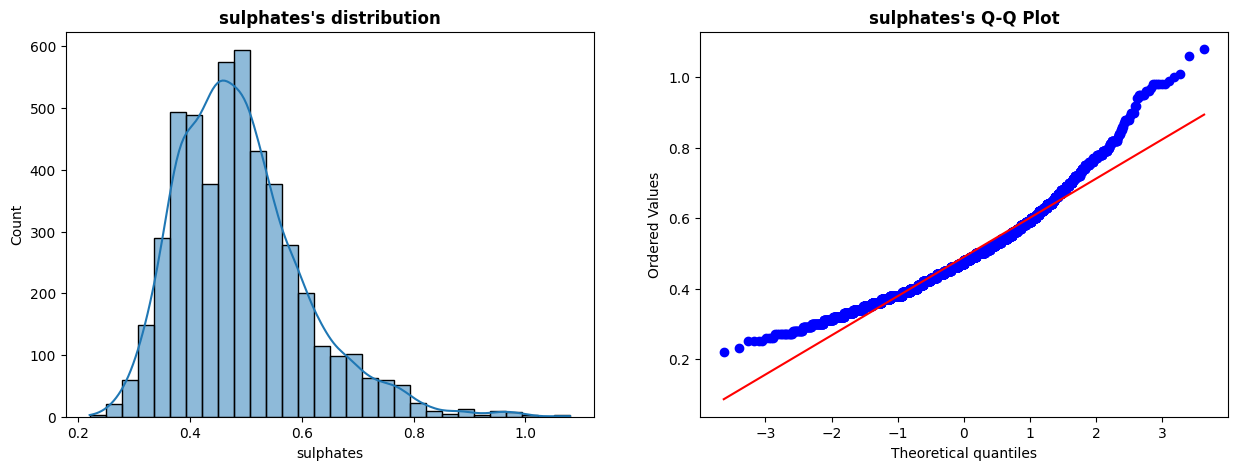

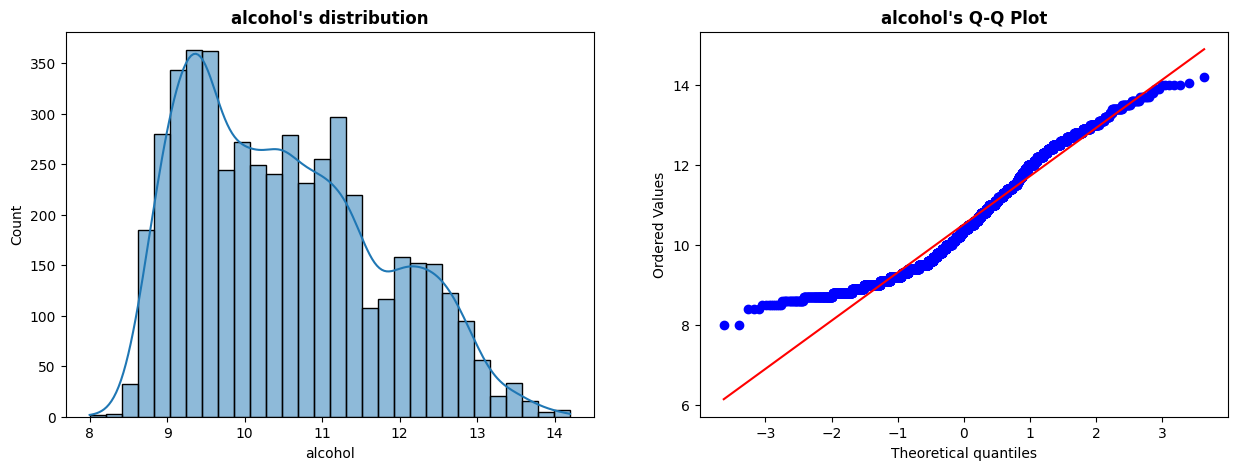

In [14]:
### Checking distribution of Continuous numerical features
for i in continuous_features:
 plt.figure(figsize=(15,5))
 plt.subplot(121)
 sns.histplot(data=dataset, x=i, kde=True, bins=30)
 plt.title("{}'s distribution".format(i),fontweight="bold")
 
 plt.subplot(122)
 stats.probplot(dataset[i], dist='norm', plot=plt)
 plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
 plt.show();

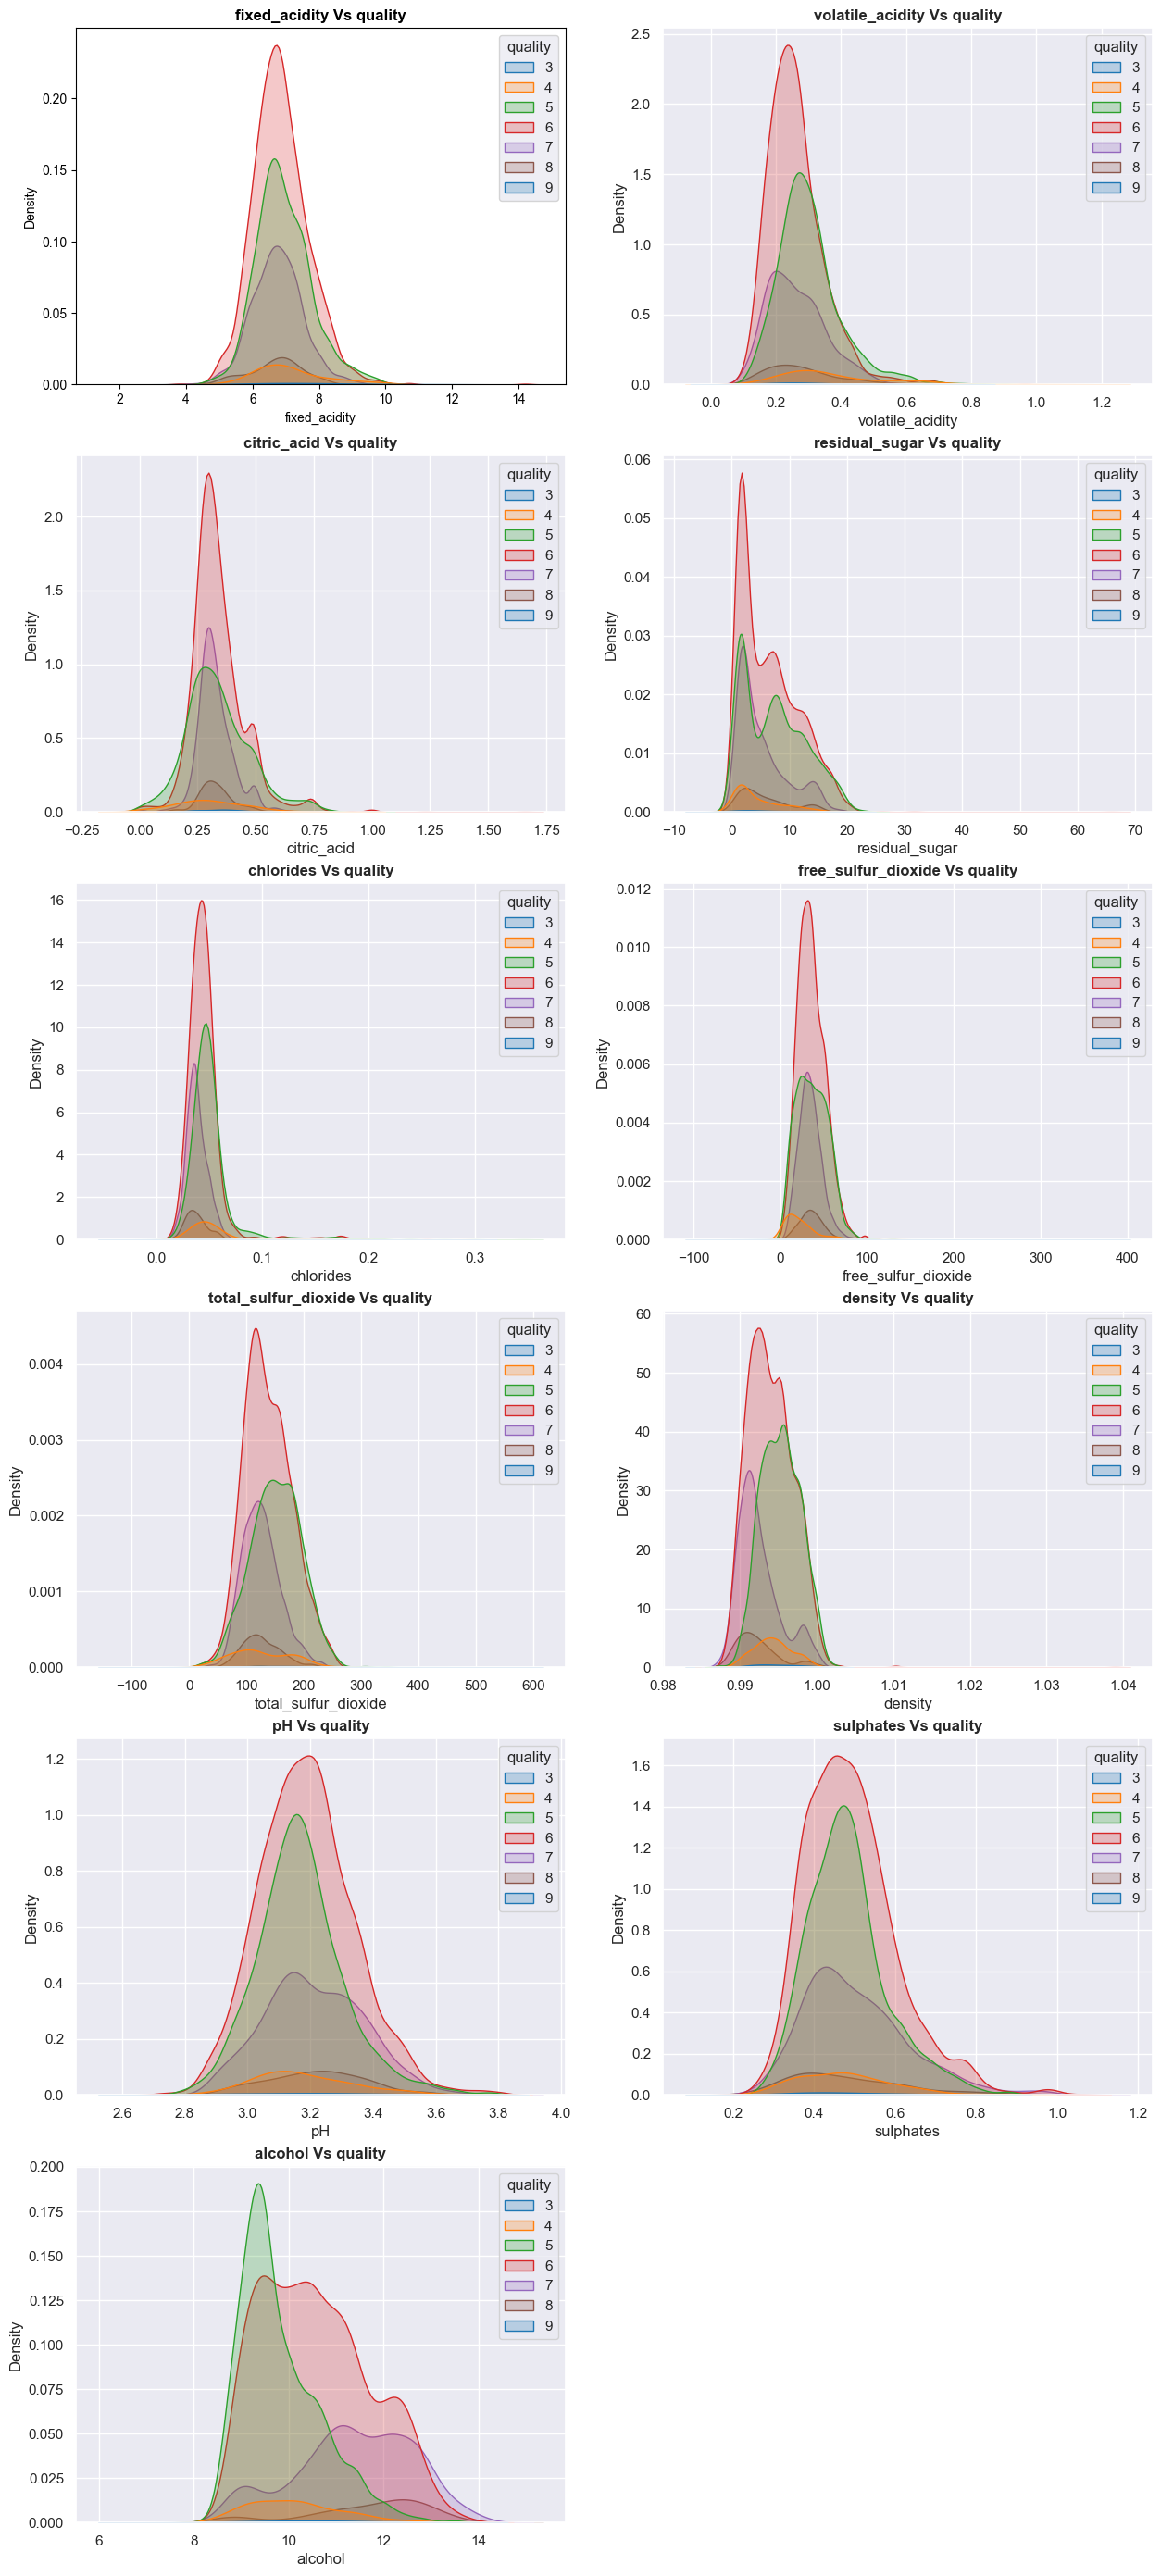

In [15]:
### Comparing Continuous numerical features with quality feature
palette1=sns.color_palette("tab10", 6)
plt.figure(figsize=(15,35))
for i in enumerate(continuous_features):
 plt.subplot(6, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(5,5)})
 sns.kdeplot(data=dataset, x=i[1], hue='quality', palette=palette1, fill=True)
 plt.title("{} Vs quality".format(i[1]),fontweight="bold")

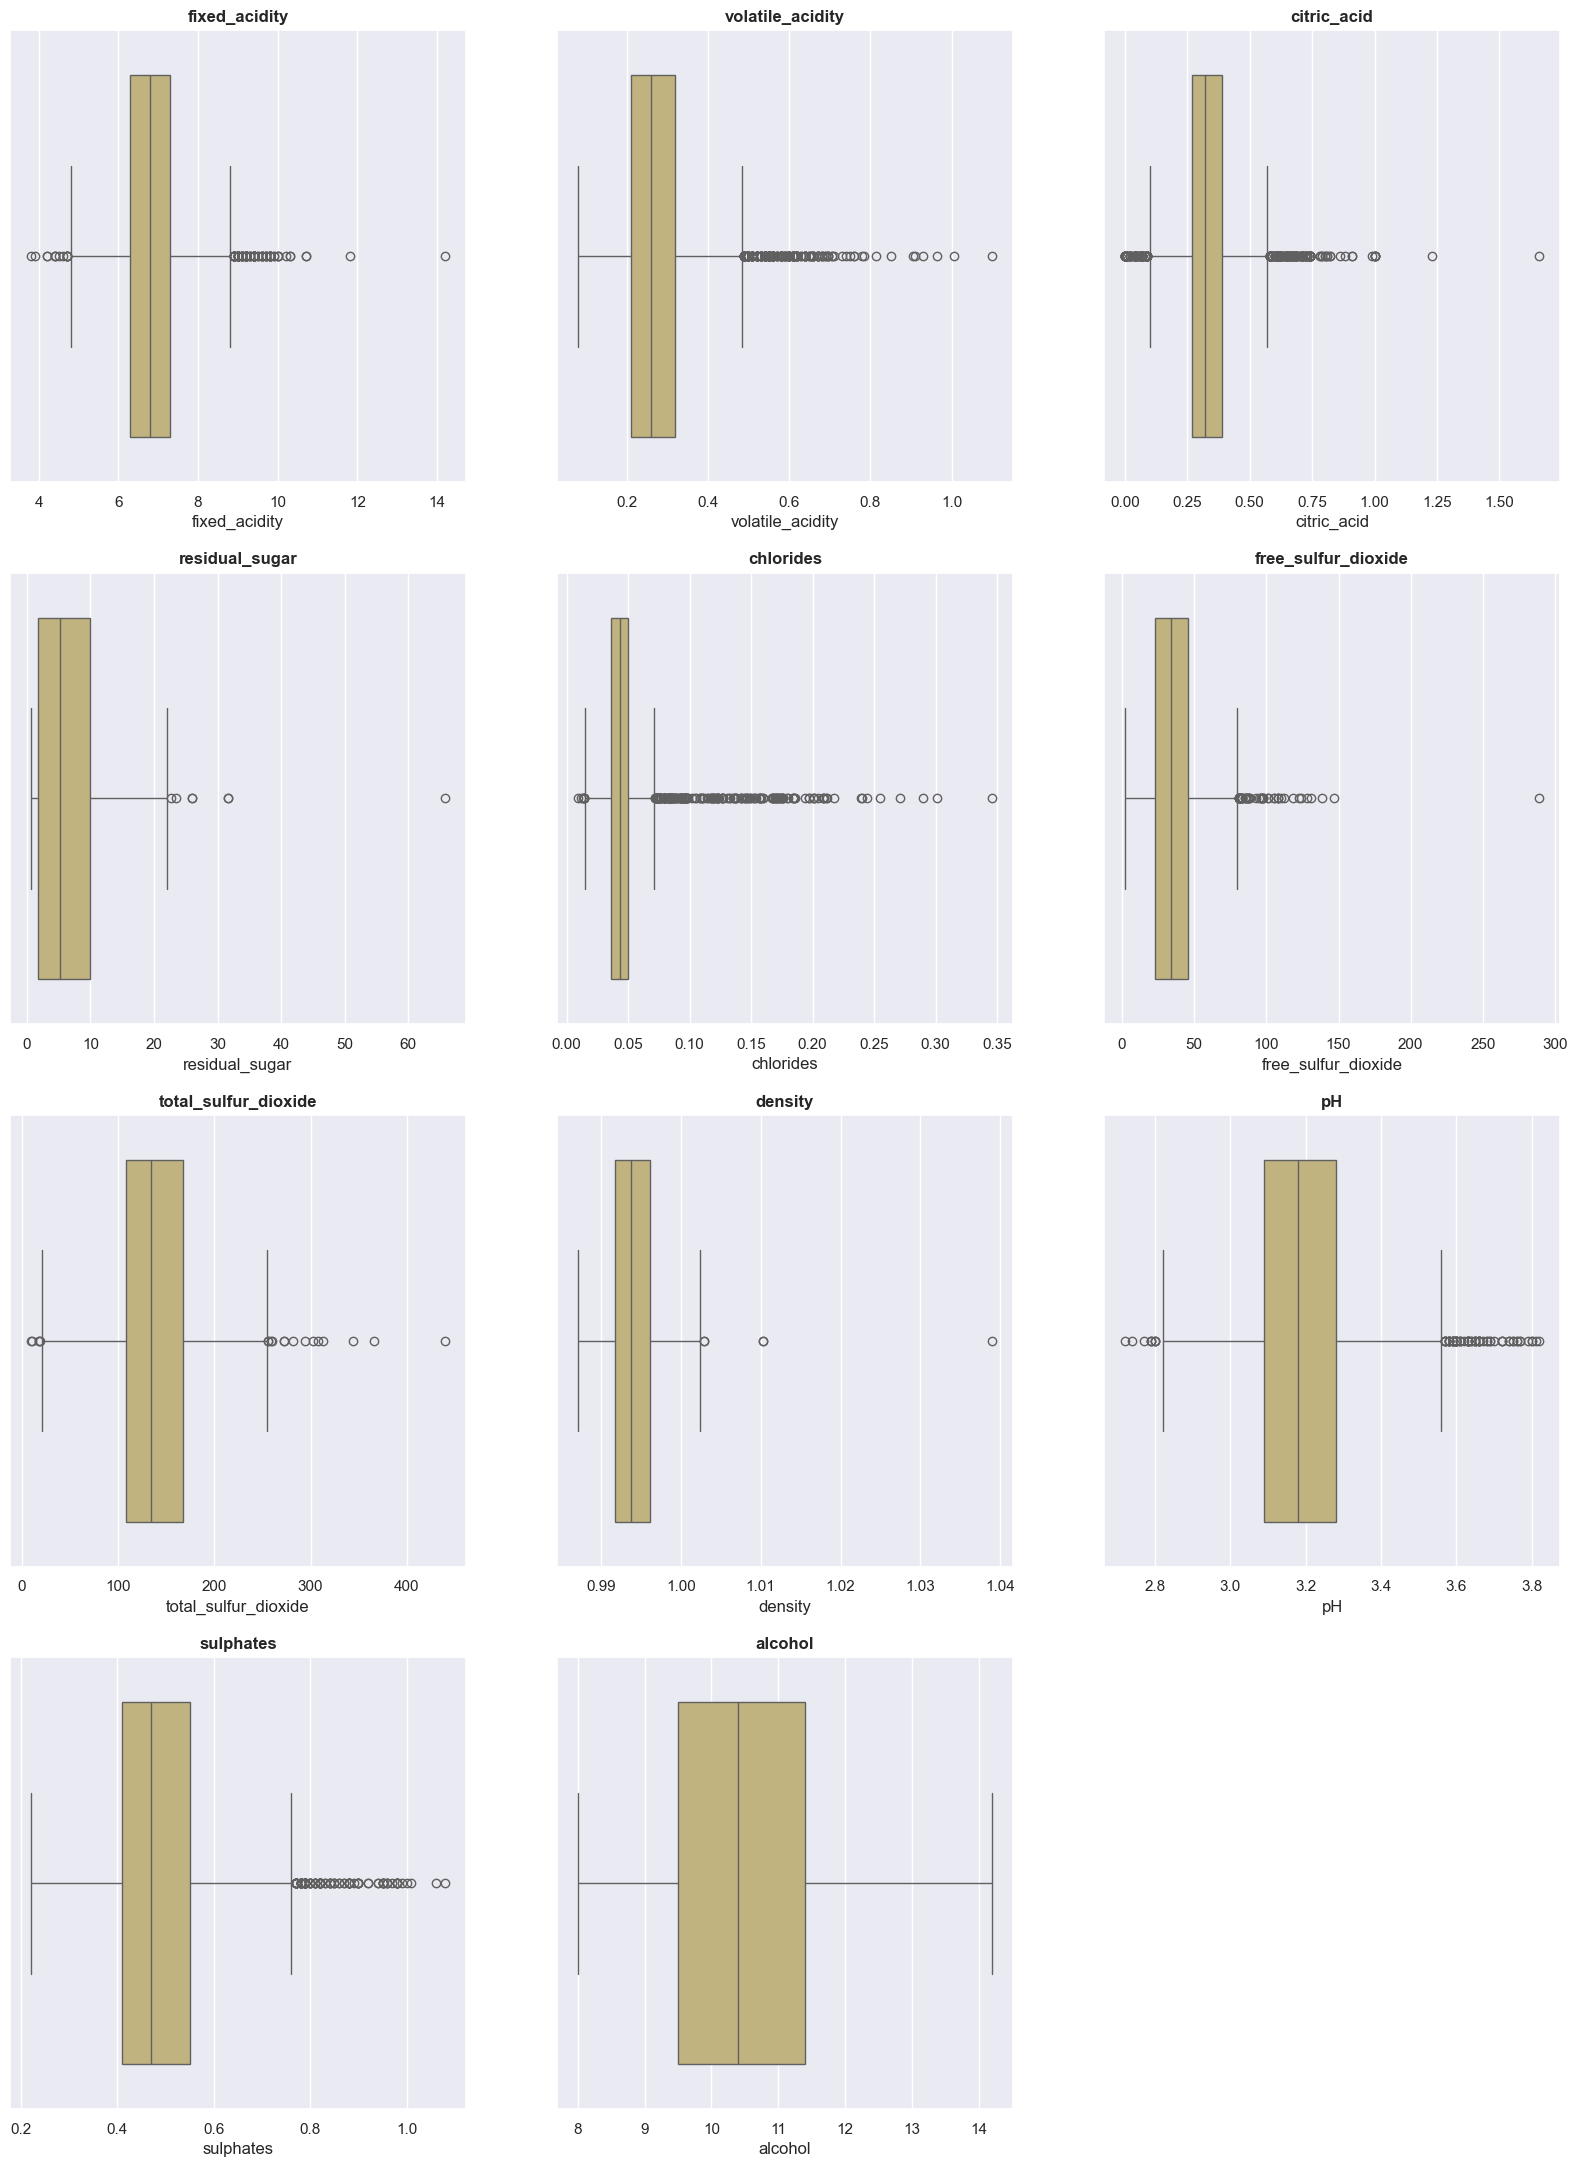

In [16]:
### Checking outliers in numerical features
plt.figure(figsize=(20,27))
for i in enumerate(continuous_features):
 plt.subplot(4, 3, i[0]+1)
 sns.set(rc={'figure.figsize':(10,6)})
 sns.boxplot(data=dataset, x=i[1], color='y')
 plt.title("{}".format(i[1]), fontweight="bold")

In [17]:
### getting correlation for all the features
corr=round(dataset.corr(),2)
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
volatile_acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07,-0.19
citric_acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
residual_sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45,-0.10
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36,-0.21
free_sulfur_dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25,0.01
total_sulfur_dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45,-0.17
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78,-0.31
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12,0.10
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02,0.05


<Axes: >

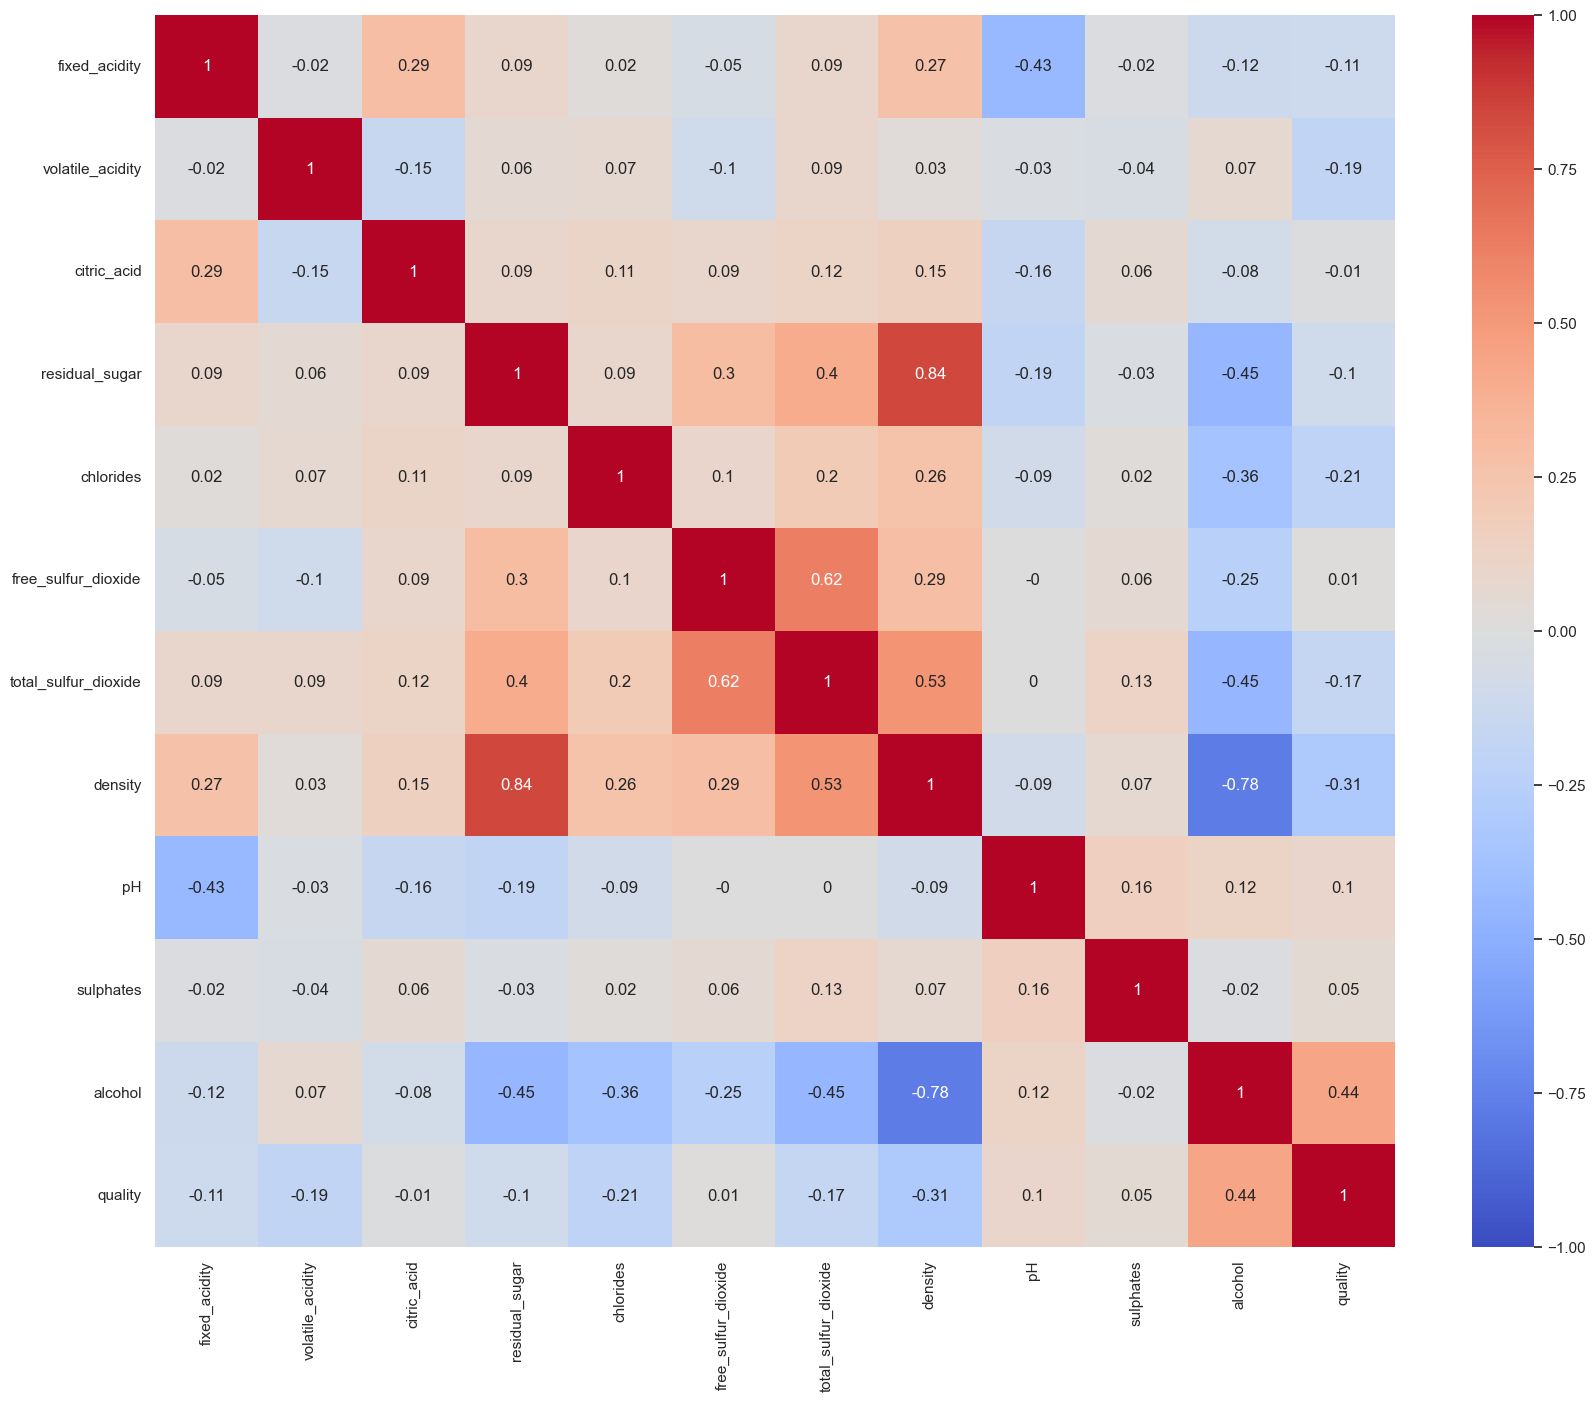

In [18]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

## 2.3 Splitting data into independent and dependent features

In [19]:
### splitting data into independent dataframe and dependent series
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


## Class imbalance

In [20]:
y.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [22]:
y.value_counts()

quality
6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: count, dtype: int64

In [23]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
### both will have same shape
X_train.shape, y_train.shape

((11539, 11), (11539,))

In [25]:
### both will have same shape
X_test.shape, y_test.shape

((3847, 11), (3847,))

## 2.4 Transforming data

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.19556385, -0.00509806,  1.31512867, ...,  2.14288058,
        -0.5008948 ,  0.48949968],
       [-1.11795022, -0.47909307,  0.86491548, ...,  1.94141079,
        -0.53924709,  0.62312683],
       [-0.7140764 ,  2.21432932, -1.65882317, ...,  0.35791958,
        -1.52055459, -0.44211887],
       ...,
       [ 2.54674468, -0.32845101,  1.01119416, ..., -1.91898685,
        -1.1622015 , -0.78411887],
       [ 1.11666073, -0.29352294,  0.14186796, ...,  0.04286396,
         1.41105801, -0.3589053 ],
       [-1.0680454 ,  0.4004202 ,  1.15479488, ...,  0.21272633,
        -1.27247269,  0.95774963]])

In [27]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.69625626,  0.47561009,  1.21735695, ..., -2.47715598,
        -0.11850424, -1.43869345],
       [ 0.69625626,  1.53316802, -1.52025138, ..., -0.65714158,
         0.26388632, -0.0503944 ],
       [-0.6870363 , -1.27342727, -0.78057014, ...,  0.1552691 ,
        -0.42460071,  0.18721839],
       ...,
       [-1.36935967, -0.47356318, -0.44859335, ...,  0.6353446 ,
        -1.0376204 ,  1.05006622],
       [-0.8802605 , -0.29352294,  1.51067213, ...,  0.7428695 ,
        -0.40529716, -0.82167165],
       [ 0.17075068,  0.66789335, -1.81356656, ...,  0.6028684 ,
         1.02866744,  1.33790466]])

<h1 style="color: green;">3.0 Building Model</h1>

## 3.1 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [29]:
log_pred=log_reg.predict(X_test)
log_pred

array([5, 4, 7, ..., 8, 4, 7], dtype=int64)

In [30]:
acc=accuracy_score(y_test, log_pred)
acc

0.5204055107876268

In [31]:
report=classification_report(y_test, log_pred, zero_division=False)
print(report)

              precision    recall  f1-score   support

           3       0.48      0.54      0.51       525
           4       0.60      0.63      0.61       545
           5       0.45      0.43      0.44       571
           6       0.31      0.21      0.25       574
           7       0.36      0.35      0.35       546
           8       0.46      0.53      0.49       552
           9       0.89      1.00      0.94       534

    accuracy                           0.52      3847
   macro avg       0.51      0.52      0.51      3847
weighted avg       0.50      0.52      0.51      3847



## 3.2 Decision tree Classifier 

In [32]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
decTree_pred=decisionTree.predict(X_test)
decTree_pred

array([3, 6, 7, ..., 8, 5, 7], dtype=int64)

In [34]:
acc=accuracy_score(y_test, decTree_pred)
acc

0.7980244346243827

In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(decisionTree, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

CV Score: 77.1286661628131


In [36]:
report=classification_report(y_test, log_pred, zero_division=False)
print(report)

              precision    recall  f1-score   support

           3       0.48      0.54      0.51       525
           4       0.60      0.63      0.61       545
           5       0.45      0.43      0.44       571
           6       0.31      0.21      0.25       574
           7       0.36      0.35      0.35       546
           8       0.46      0.53      0.49       552
           9       0.89      1.00      0.94       534

    accuracy                           0.52      3847
   macro avg       0.51      0.52      0.51      3847
weighted avg       0.50      0.52      0.51      3847



## 3.3 Random forest Classifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
random_pred=model.predict(X_test)
random_pred

array([5, 6, 7, ..., 8, 5, 7], dtype=int64)

In [39]:
acc=accuracy_score(y_test, random_pred)
acc

0.8773069924616584

In [40]:
score = cross_val_score(model, X, y, cv=10)
print("CV Score:", np.mean(score)*100)

CV Score: 85.73435708425328


In [41]:
report=classification_report(y_test, random_pred, zero_division=False)
print(report)

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       525
           4       0.91      0.97      0.94       545
           5       0.78      0.78      0.78       571
           6       0.75      0.60      0.67       574
           7       0.78      0.84      0.81       546
           8       0.94      0.97      0.95       552
           9       1.00      1.00      1.00       534

    accuracy                           0.88      3847
   macro avg       0.88      0.88      0.88      3847
weighted avg       0.87      0.88      0.87      3847



## 3.4 Extra tree classifier

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
extraTree = ExtraTreesClassifier()
extraTree.fit(X_train,y_train)

ExtraTreesClassifier()

In [43]:
extraTree_pred=extraTree.predict(X_test)
extraTree_pred

array([5, 6, 7, ..., 8, 5, 7], dtype=int64)

In [44]:
acc=accuracy_score(y_test, extraTree_pred)
acc

0.8871848193397452

In [45]:
score = cross_val_score(extraTree, X, y, cv=10)
print("CV Score:", np.mean(score)*100)

CV Score: 86.29332204469658


## 3.5 support vector classification

In [46]:
svc=SVC(kernel='rbf', degree=1, C=11)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
acc=accuracy_score(y_test, svc_pred)
acc

0.7964647777488952

In [47]:
report=classification_report(y_test, svc_pred, zero_division=False)
print(report)

              precision    recall  f1-score   support

           3       0.97      1.00      0.98       525
           4       0.83      0.95      0.89       545
           5       0.68      0.64      0.66       571
           6       0.62      0.42      0.50       574
           7       0.63      0.74      0.68       546
           8       0.82      0.86      0.84       552
           9       1.00      1.00      1.00       534

    accuracy                           0.80      3847
   macro avg       0.79      0.80      0.79      3847
weighted avg       0.79      0.80      0.79      3847



In [48]:
import lightgbm 
litgbm= lightgbm.LGBMClassifier()
litgbm.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 11539, number of used features: 11
[LightGBM] [Info] Start training from score -1.931114
[LightGBM] [Info] Start training from score -1.943141
[LightGBM] [Info] Start training from score -1.958995
[LightGBM] [Info] Start training from score -1.960840
[LightGBM] [Info] Start training from score -1.943746
[LightGBM] [Info] Start training from score -1.947384
[LightGBM] [Info] Start training from score -1.936508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [49]:
litgbm_pred=svc.predict(X_test)
acc=accuracy_score(y_test, litgbm_pred)
acc

0.7964647777488952

In [50]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [51]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_